In [1]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target

In [2]:
import numpy as np
noisy_digits = X + np.random.normal(0, 4, size = X.shape)

In [3]:
noisy_digits[y == 0, :][:10].shape

(10, 64)

In [5]:
example_digits = noisy_digits[y == 0, :][:10]
for num in range(1, 10):
    X_num = noisy_digits[y == num, :][:10]
    example_digits = np.vstack([example_digits, X_num])

In [6]:
example_digits.shape

(100, 64)

在一幅图中绘制多个图像

In [7]:
import matplotlib.pyplot as plt
def plot_digits(data):
    fig, axes = plt.subplots(10, 10, figsize=(10, 10), 
                            subplot_kw={'xticks':[], 'yticks':[]},
                            gridspec_kw=dict(hspace = 0.1, wspace = 0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                 cmap = 'binary', interpolation = 'nearest',
                 clim = (0, 16))
    plt.show()

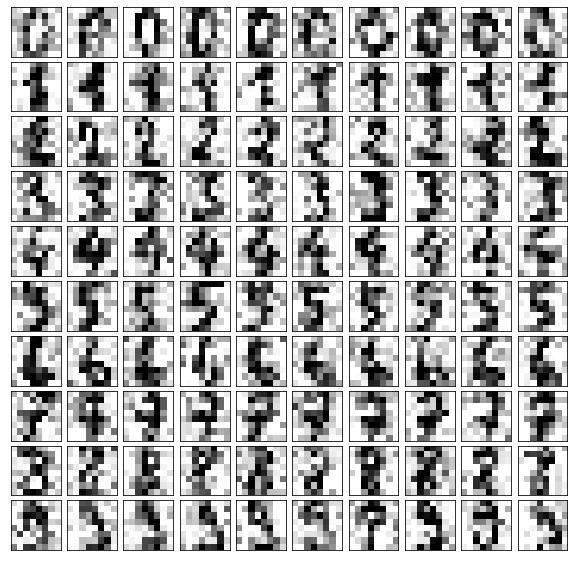

In [8]:
plot_digits(example_digits)

In [12]:
from sklearn.decomposition import PCA
#噪音比较大，所以保留的信息少一点
pca = PCA(0.5)

In [13]:
pca.fit(noisy_digits)

PCA(copy=True, iterated_power='auto', n_components=0.5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [14]:
pca.n_components_

12

In [16]:
components = pca.transform(example_digits)

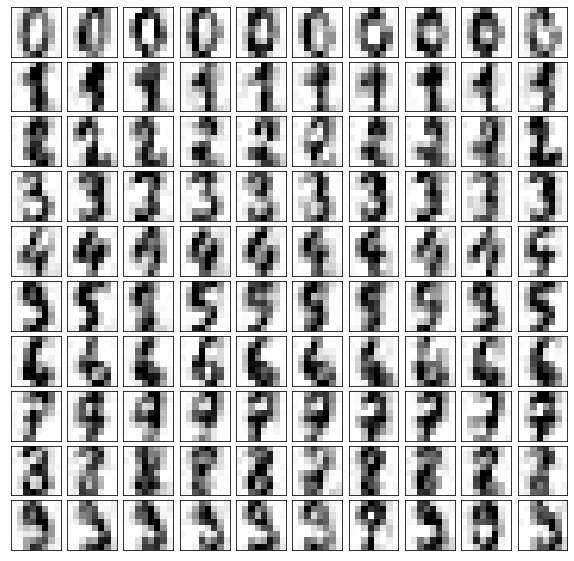

In [17]:
filter_digits = pca.inverse_transform(components)
plot_digits(filter_digits)